# UFRJ / COPPE / Programa de Engenharia Eletrica
# CPE-723 – Otimizacao Natural (Parte II - Simulated Annealing)
# Lista de Exercicios #2
# Carlos Eduardo Covas Costa

In [5]:
import random
from random import randint
import math
import numpy as np
import matplotlib.pyplot as plt

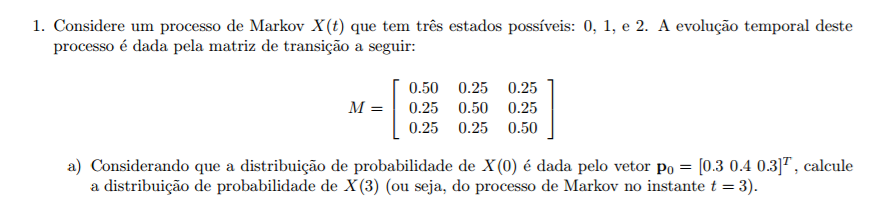

In [5]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/um_a.png')

In [3]:
m = np.array([[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5]])
p0 = np.array([[0.3],[0.4],[0.3]])
p1 = np.dot(m,p0)
p2 = np.dot(m,p1)
p3 = np.dot(m,p2)
print(p3)

[[ 0.3328125]
 [ 0.334375 ]
 [ 0.3328125]]


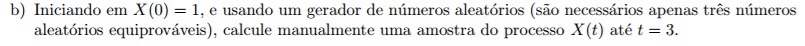

In [6]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/um_b.png')

In [8]:
print('1)Estado aleatório: '+str(randint(0,2))+', Número gerado aleatoriamente com densidade uniforme: '+str(np.random.uniform(0,1)))
print('2)Estado aleatório: '+str(randint(0,2))+', Número gerado aleatoriamente com densidade uniforme: '+str(np.random.uniform(0,1)))
print('3)Estado aleatório: '+str(randint(0,2))+', Número gerado aleatoriamente com densidade uniforme: '+str(np.random.uniform(0,1)))

1)Estado aleatório: 0, Número gerado aleatoriamente com densidade uniforme: 0.271834142178
2)Estado aleatório: 2, Número gerado aleatoriamente com densidade uniforme: 0.393568312876
3)Estado aleatório: 2, Número gerado aleatoriamente com densidade uniforme: 0.433574387646


1) M[0,1] = 0.25, 0.25 < 0.271834142178 => x1 = x0, continua em 1 ao invés de ir para 0 (estado futuro)

2) M[2,1] = 0.25, 0.25 < 0.393568312876 => x2 = x1, continua em 1 ao invés de ir para 2 (estado futuro)

3) M[2,1] = 0.25, 0.25 < 0.433574387646 => x3 = x2, continua em 1 ao invés de ir para 2 (estado futuro)
    

Para realizar o sorteio, compara-se um número gerado aleatoriamente com densidade uniforme com a probabilidade cumulativa da matriz m .

In [5]:
m[2,1]

0.25

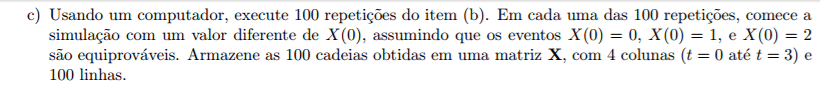

In [7]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/um_c.png')

In [59]:
m = np.matrix([[0.50, 0.25, 0.25], [0.25, 0.50, 0.25], [0.25, 0.25, 0.50]])
#for i in range(100):
#    NovoEstado = randint(0,2)
#    aleatorio = np.random.uniform(0,1)


In [66]:
n = 100
estados = np.empty(shape=(n,4))
for i in range(n):
    x0 = np.random.choice([0, 1, 2])
    x1 = np.random.choice([0, 1, 2], p = m[x0].tolist()[0])
    x2 = np.random.choice([0, 1, 2], p = m[x1].tolist()[0])
    x3 = np.random.choice([0, 1, 2], p = m[x2].tolist()[0])
    
    estados[i] = [x0, x1, x2, x3]
print(estados)

[[ 2.  1.  2.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  2.  2.]
 [ 2.  0.  0.  2.]
 [ 2.  1.  1.  1.]
 [ 2.  0.  2.  0.]
 [ 1.  2.  2.  2.]
 [ 1.  2.  0.  0.]
 [ 1.  1.  1.  0.]
 [ 1.  1.  1.  1.]
 [ 0.  2.  0.  2.]
 [ 0.  1.  2.  1.]
 [ 2.  2.  0.  0.]
 [ 1.  1.  0.  0.]
 [ 0.  2.  1.  1.]
 [ 0.  1.  1.  1.]
 [ 1.  2.  2.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  1.]
 [ 0.  0.  0.  2.]
 [ 1.  1.  0.  1.]
 [ 1.  0.  2.  0.]
 [ 0.  1.  1.  1.]
 [ 2.  2.  1.  2.]
 [ 2.  2.  2.  2.]
 [ 1.  1.  0.  0.]
 [ 1.  2.  2.  0.]
 [ 2.  0.  0.  0.]
 [ 1.  2.  0.  0.]
 [ 1.  0.  0.  2.]
 [ 2.  2.  2.  1.]
 [ 0.  0.  2.  2.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  2.]
 [ 1.  1.  1.  0.]
 [ 1.  1.  1.  0.]
 [ 2.  1.  1.  2.]
 [ 2.  0.  1.  0.]
 [ 2.  2.  1.  1.]
 [ 2.  2.  2.  0.]
 [ 2.  2.  2.  2.]
 [ 1.  1.  1.  2.]
 [ 0.  2.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  2.  2.  1.]
 [ 0.  0.  2.  2.]
 [ 1.  2.  0.  0.]
 [ 0.  0.  2.  1.]
 [ 1.  0.  2.  1.]
 [ 0.  1.  1.  2.]
 [ 1.  2.  2.  2.]
 [ 2.  0.  0

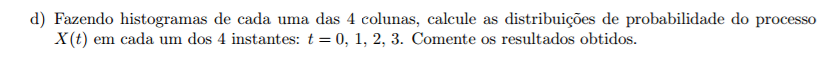

In [67]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/um_d.png')

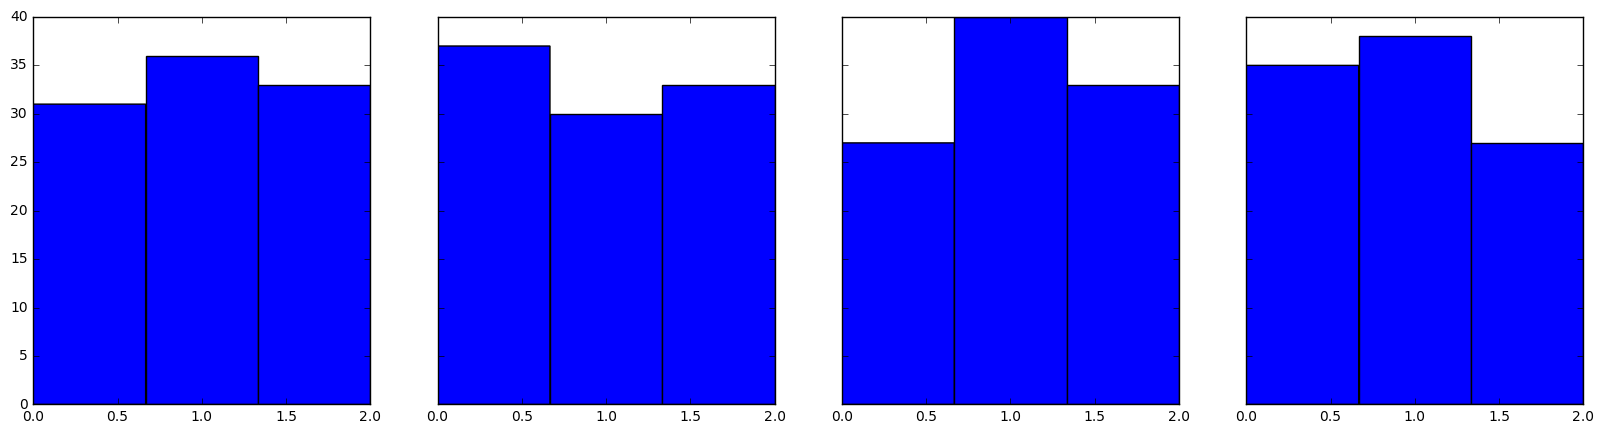

In [63]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(20,5))

ax0.hist(estados[:,0], bins = 3)
ax1.hist(estados[:,1], bins = 3)
ax2.hist(estados[:,2], bins = 3)
ax3.hist(estados[:,3], bins = 3)

plt.show()

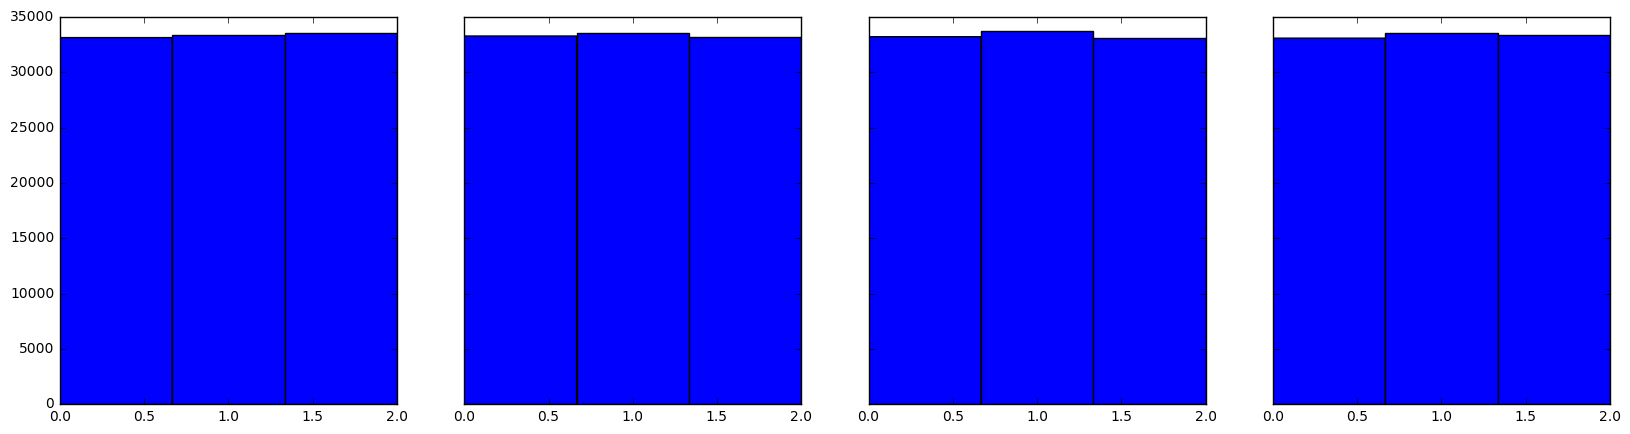

In [65]:
n = 100000
estados = np.empty(shape=(n,4))
for i in range(n):
    x0 = np.random.choice([0, 1, 2])
    x1 = np.random.choice([0, 1, 2], p = m[x0].tolist()[0])
    x2 = np.random.choice([0, 1, 2], p = m[x1].tolist()[0])
    x3 = np.random.choice([0, 1, 2], p = m[x2].tolist()[0])
    
    estados[i] = [x0, x1, x2, x3]
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(20,5))

ax0.hist(estados[:,0], bins = 3)
ax1.hist(estados[:,1], bins = 3)
ax2.hist(estados[:,2], bins = 3)
ax3.hist(estados[:,3], bins = 3)

plt.show()    

Os estados são inicialmente equiprováveis com 1/3 de chance para cada estado. Conforme o processo de Markov ocorre uma tendência para distribuição uniforme dos estados. Logo, a medida que t aumenta, a distribuição de probabilidades tende a 1/3 para cada estado, independente da distribuição inicial. Foram executadas as 100 repetições, mas também 100000 repetições para que fosse possível perceber melhor o efeito da distribuição com mais amostras.

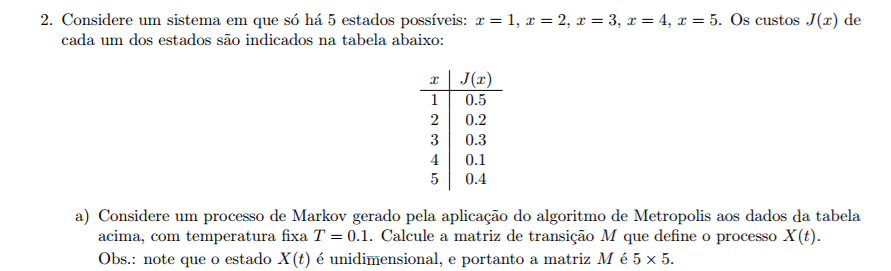

In [9]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/dois_a.png')

In [26]:
m = np.zeros(shape=(5,5))
J = [0.5,0.2,0.3,0.1,0.4]
for j in range(5):
    for i in range(5):
        if J[i] < J[j]:
            m[i,j] = 0.25
            #print(i,j,m[i,j])
        else:
                m[i,j] = 0.25*math.exp(-(J[i]-J[j])/0.1)
                m[j,j] = 0#0.25*(1-math.exp(-(J[i]-J[j])/0.1))
    #print(j,m.sum(axis=0)[j])
    m[j,j] = 1- m.sum(axis=0)[j]
        
        #print(i,j,m[j,j])
m            

array([[ 0.        ,  0.01244677,  0.03383382,  0.00457891,  0.09196986],
       [ 0.25      ,  0.61174955,  0.25      ,  0.09196986,  0.25      ],
       [ 0.25      ,  0.09196986,  0.37419632,  0.03383382,  0.25      ],
       [ 0.25      ,  0.25      ,  0.25      ,  0.85717064,  0.25      ],
       [ 0.25      ,  0.03383382,  0.09196986,  0.01244677,  0.15803014]])

In [27]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/dois_b.png')

In [32]:
x0 = 1

x1 = np.random.choice([1, 2, 3, 4, 5], p = m[x0-1].tolist())
x2 = np.random.choice([1, 2, 3, 4, 5], p = m[x0-1].tolist())
x3 = np.random.choice([1, 2, 3, 4, 5], p = m[x0-1].tolist())
x4 = np.random.choice([1, 2, 3, 4, 5], p = m[x0-1].tolist())

print('Amostras calculadads manualmente: '+str(x1)+', '+str(x2)+', '+str(x3)+', '+str(x4))


Amostras calculadads manualmente: 3, 5, 2, 4


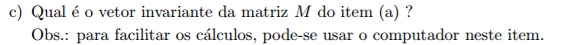

In [12]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/dois_c.png')

In [82]:
autovalores, autovetores = np.linalg.eig(m)
print(autovalores)
print(autovetores[:,0])
#np.linalg.eigvals(m)

[ 1.         -0.09196986  0.60717064  0.36174955  0.12419632]
[-0.01703161 -0.34208911 -0.12584755 -0.9298946  -0.04629673]


In [83]:
autovetores[:,0]/autovetores[:,0].sum()
#a = np.array([0.0170,0.3421,0.1258,0.9299,0.0463])
#a/a.sum()
#[0.0170,0.3421,0.1258,0.9299,0.0463]
#a=a/sum(a)

array([ 0.01165623,  0.23412166,  0.08612854,  0.63640865,  0.03168492])

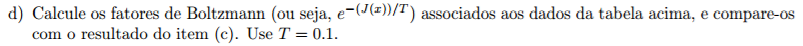

In [13]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/dois_d.png')

In [88]:
J = [0.5,0.2,0.3,0.1,0.4]
boltzmann = []
for j in J:
    b = math.exp(-(j)/0.1)
    boltzmann.append(b)
barray = np.asarray(boltzmann)
barray/barray.sum()

array([ 0.01165623,  0.23412166,  0.08612854,  0.63640865,  0.03168492])

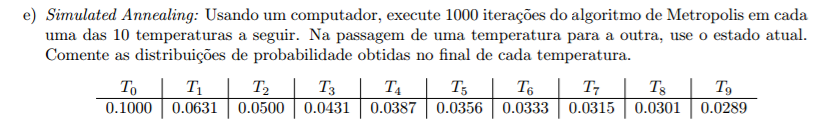

In [14]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/dois_e.png')

In [53]:
N = 1000
T = [0.1000, 0.0631, 0.0500, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289]
k = len(T)
J = [0.5, 0.2, 0.3, 0.1, 0.4]
def sa(k,N,T,epsilon):
    xvalues = []
    jvalues = []
    x = 0
    j = J[x]
    xvalues.append(x)
    jvalues.append(j)
    for rodada in range(1,k+1,1):
        for i in range(N):        
            R = np.random.uniform(-1,1)#Amostras aleatórias em distribuição uniforme
            xcand = x + np.random.choice([-1,1]) # candidato
            jcand = J[int(xcand)]
            q = math.exp(float((-(jcand-j))/float(T[k-1])))
            #print(q)
            if(jcand-j)<0:
                x = xcand
                j = jcand
            elif(np.random.uniform(0,1)<q):#Amostras aleatórias em distribuição uniforme.                
            #elif(np.random.normal(loc=0.0, scale=1.0, size=None)<q):#Amostras aleatórias em distribuição normal (Gaussian).
                x = xcand
                j = jcand
            else:
                x = x
                j = j
            #print(j)    
            xvalues.append(x)
            jvalues.append(j)
        #T = T/(math.log((1+k),2))
    #return j
        print(rodada,x+1,j)
    #plt.plot(xvalues,jvalues)
    #plt.show()
    #return xvalues

#print(sa(10,1000,1,0.1))
sa(k,N,T,0.1)

(1, 4, 0.1)
(2, 4, 0.1)
(3, 3, 0.3)
(4, 4, 0.1)
(5, 4, 0.1)
(6, 4, 0.1)
(7, 4, 0.1)
(8, 4, 0.1)
(9, 4, 0.1)
(10, 4, 0.1)


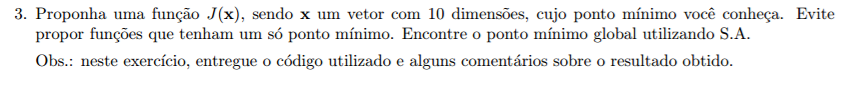

In [15]:
from IPython.display import Image
Image(filename='C:/Users/C00310965/Documents/livros/pictures/lista2/tres.png')

In [47]:
def sa(k,N,T,epsilon,dim):
    #j = 
    J = lambda x: sum([float(math.sin(x[d]))/float(x[d]) for d in range(dim)])
    #xvalues = []
    #jvalues = []
    x = np.random.uniform(low=1, high=20,size=dim)
    #print(x)
    j = J(x)
    #print(j)
    #xvalues.append(x)
    #jvalues.append(j)
    for rodada in range(1,k+1,1):
        for i in range(N):
            R = np.random.uniform(-1,1,size=dim)#Amostras aleatórias em distribuição uniforme
            xcand = x+(epsilon)*R#x candidato
            jcand = J(xcand)
            #print(xcand)
            #q = math.exp(float((-(jcand-j))/float(T)))
            try:
                q = math.exp(float((-(jcand-j))/float(T)))
            except OverflowError:
                q = float('inf')
            #print(q)
            if(jcand<j):
                x = xcand
                j = jcand
            elif(np.random.uniform(0,1)<q):#Amostras aleatórias em distribuição uniforme.
                x = xcand
                j = jcand
            else:
                x = x
                j = j
            #print(j)    
            #xvalues.append(x)
            #jvalues.append(j)
        T = T/(math.log((1+k),2))
    return j
    #print(jvalues)
    #plt.plot(xvalues)
    #plt.show()
    #return xvalues


In [18]:
resultspar1 = []
resultspar2 = []
resultspar3 = []
for i in range(20):
    par1 = sa(10,10000,1,0.1,10)
    resultspar1.append(par1)
    par2 = sa(10,1000,1,0.3,10)
    resultspar2.append(par2)
    par3 = sa(100,10000,10,0.1,10)
    resultspar3.append(par3)
print(resultspar1)
print(resultspar2)
print(resultspar3)

[-1.4757380052829538, -1.349995477212914, -1.084034891549222, -1.4603300053687875, -1.4512913913458183, -1.2587923414861875, -1.4758870483835749, -1.131496142964055, -1.2922406482796254, -1.1263073607039227, -1.2791071476678242, -0.9953156587589923, -1.0196891561142045, -1.243248324690874, -1.537405037900332, -1.4757282654202604, -1.4448942276059122, -1.2522525973805483, -0.9581122775486433, -1.393612812184463]
[-1.216788225637477, -1.3893450274600647, -1.0815519580932755, -1.859611990290755, -1.1546268813022642, -0.9678711433362128, -1.0967584821364627, -0.965786388537851, -1.1301632403361401, -1.0320628900814766, -1.15260710558219, -1.0080652897460507, -0.9562133177782604, -1.3917384149059184, -1.583450918077841, -0.6380419533044017, -1.1212793272718822, -0.7116594189098199, -0.9491695905192571, -1.4239930345146417]
[-1.1109708137873469, -1.0539014370305666, -1.4116262305132377, -1.2330480422788122, -1.1175455490846484, -0.9672127284163955, -1.2420293944816907, -1.3968511145087688, -

In [16]:
print('Results 1: '+str(np.mean(resultspar1)))
print('Results 2: '+str(np.mean(resultspar2)))
print('Results 3: '+str(np.mean(resultspar3)))


Results 1: -1.17360495811
Results 2: -1.21614240793
Results 3: -1.22447403165


In [13]:
print(1*-0.217223617634)
print(2*-0.217223617634)
print(10*-0.217223617634)
print(10*-0.217223617634)
print(10*-0.0913252)
print(10*-0.0579718)

-0.217223617634
-0.434447235268
-2.17223617634
-2.17223617634
-0.913252
-0.579718


A função escolhida foi sin(x)/x, no intervalo entre 1 e 20. Como foram utilizadas 10 dimensões o mínimo local se tornou a soma dos 10 mínimo, logo -2.1723

Esta função possui mínimo global -0.217234 em x≈4.49341, além mínimos locais em:  

Min local ≈-0.0913252 em x≈10.904122

Min local ≈-0.0579718 em x≈17.220755

O valor inicial de x foi escolhido utilizando-se uma variável aleatória uniforme no intervalo entr 1 e 20. 
Foram testadas 3 diferentes configurações de parâmetros para o algoritmo com 20 testes feitos para cada configuração.
A média dos valores dos testes podem ser vistos abaixo. 
Sendo k o número de temperaturas em decaimento logaritmico,N o número de iterações para cada temperatura, T a temperatura inicial, episilon o valor da pertubação e  dim o número de dimensões. O mínimo global não foi atingido para 10 dimensões


In [21]:
print('Results 1: (k=10,N=10000,T=1,epsilon=0.1,dim=10)='+str(np.mean(resultspar1)))
print('Results 2: (k=10,N=1000,T=1,epsilon=0.3,dim=10)='+str(np.mean(resultspar2)))
print('Results 3: (k=100,N=10000,T=10,epsilon=0.1,dim=10)='+str(np.mean(resultspar3)))

Results 1: (k=10,N=10000,T=1,epsilon=0.1,dim=10)=-1.28527394089
Results 2: (k=10,N=1000,T=1,epsilon=0.3,dim=10)=-1.14153922989
Results 3: (k=100,N=10000,T=10,epsilon=0.1,dim=10)=-1.17484582836


In [48]:
results1d = []
results2d = []
for i in range(20):
    par1 = sa(10,10000,1,0.1,1)
    results1d.append(par1)
    par2 = sa(10,10000,1,0.1,2)
    results2d.append(par2)
print(results1d)
print(results2d)
print('Results 1D: (k=10,N=10000,T=1,epsilon=0.1,dim=1)='+str(np.mean(results1d)))
print('Results 2D: (k=10,N=10000,T=1,epsilon=0.1,dim=2)='+str(np.mean(results2d)))

[-0.033524150080493274, -0.21723183231363216, -0.09131876446379633, -0.09132511480411251, -0.09132277242657827, -0.03352374197476858, -0.21723231248412972, -0.2172317606628387, -0.09132402338653886, -0.05796176208375291, -0.09128997900406166, -0.091308968822409, -0.03351697266997406, -0.2172335572456498, -0.21723361934102114, -0.042479036218146714, -0.21722765944079003, -0.057967332943384874, -0.09132452205233224, -0.057971208763526905]
[-0.27520482866540497, -0.18263884652213752, -0.1492705489965259, -0.10044502501695293, -0.3085552262786847, -0.3085539498894526, -0.0849403532904438, -0.4344527501893164, -0.30854641994601895, -0.25969872553251117, -0.43446108013002127, -0.27520344591990803, -0.2507585800918325, -0.43442771112651063, -0.2596988176290159, -0.12482893835629841, -0.43444731546378923, -0.27520473227738607, -0.3085500079869151, -0.434454370772135]
Results 1D: (k=10,N=10000,T=1,epsilon=0.1,dim=1)=-0.112977454559
Results 2D: (k=10,N=10000,T=1,epsilon=0.1,dim=2)=-0.28221708370